# A [Jupyter](https://jupyter.org/) Kernel for [PowerShell](https://github.com/PowerShell/PowerShell)

This kernel is being written in C#, and in the process, I've taken some messaging code from the [iCSharp kernel](https://github.com/zabirauf/icsharp) and made a generic library for .Net with a re-usable core for anyone who needs to create [Jupyter](https://jupyter.org/) kernels in .Net languages -- so feel free to borrow that if you like (it's under the Apache license).

## Install

I am finally doing a preliminary release: you can download from the releases link, unzip it somewhere, and run the `Install.ps1` script. Note that if you run this on Linux or OS X you should expect to see only "PowerShell (Core)" but on Windows you'll see both -- but only the "PowerShell (Full)" will actually work unless you have PowerShell Core installed in your PATH and working.

## Current Status

So far, I am only handling two messages:

* KernelInfo request
* Execute request

The PowerShell kernel is _working_, and returning text output _and errors_ as on the console (see examples below).

## PowerShell Core *and Full*

In order to get cross-platform support, this kernel is using [PowerShell Core](https://github.com/PowerShell/PowerShell), which means you'll want to have PowerShell 6 Beta 3 installed to try it out. As of today, it also builds for "Full Framework" Windows PowerShell!

To build it yourself --or to run the "PowerShell (Core)" kernel-- you need [dotnet core 2 preview](https://www.microsoft.com/net/core/preview).  You can build it by running `dotnet restore; dotnet build` from the root. If you want to contribute --and want to build it in Visual Studio-- you need [VS 2017 Preview version 15.3](https://www.visualstudio.com/vs/preview/).

In [1]:
$PSVersionTable

Name                           Value                                                                                    
----                           -----                                                                                    
PSVersion                      5.1.16215.1000                                                                           
PSEdition                      Desktop                                                                                  
PSCompatibleVersions           {1.0, 2.0, 3.0, 4.0...}                                                                  
BuildVersion                   10.0.16215.1000                                                                          
CLRVersion                     4.0.30319.42000                                                                          
WSManStackVersion              3.0                                                                                      
PSRemotingProtocolVersion      2

If we ran that same command in the "PowerShell (Core)" engine, you would see a different, result of course. Incidentally, I don't have any idea what the deal with the "GitCommitId" is -- I need to file a bug on the PowerShell repo about that.

In [1]:
$PSVersionTable

Name                           Value                                                                                    
----                           -----                                                                                    
PSVersion                      6.0.0-beta                                                                               
PSEdition                      Core                                                                                     
GitCommitId                    Could not find file 'C:\Users\Joel\.nuget\packages\system.management.automation\6.0.0-...
OS                             Microsoft Windows 10.0.16215                                                             
Platform                       Win32NT                                                                                  
PSCompatibleVersions           {1.0, 2.0, 3.0, 4.0...}                                                                  
PSRemotingProtocolVersion      2

The rest of these examples actually output the same things regardless of whether you run them in PowerShell (Full) or PowerShell (Core). And I think I will probably rename "PowerShell (Full)" after I sleep on it ...

## Feature Notes

* Basic PowerShell stuff works. There's no interactive stuff yet (I.e.: `Read-Host` and `Get-Credential` **will fail**).
* `Write-Jupyter` command allows you to customize output by specifying the mime type.
* There's a config option (in `PowerShell-Kernel.Config.json`) to turn on debug output and even break into a debugger on startup.

In [2]:
$Files = Get-ChildItem -File

### Currently there's no indicator for no output.

The IPython shell returns `null` when there's no output so you can see _something_, but I'm not sure I see value in that yet.

All commands are run in an ongoing session like a regular shell, so you can run multiple commands to capture, transform and output.

That means you can use this to do exploration and investigations, and literate DevOps...

In [3]:
$Files | Sort LastWriteTime -Descending

Directory: C:\Users\Joel\Projects\Jupyter\Jupyter-PowerShell


Mode                LastWriteTime         Length Name                                                                   
----                -------------         ------ ----                                                                   
-a----        7/12/2017   1:48 AM          93849 ReadMe.ipynb                                                           
-a----        7/12/2017   1:12 AM           5035 Release.ipynb                                                          
-a----        7/12/2017  12:52 AM          10113 null                                                                   
-a----        7/12/2017  12:46 AM            352 nuget.config                                                           
-a----         7/3/2017   1:54 AM           5906 Install.ps1                                                            
-a----        6/28/2017   1:27 AM           2540 ReadMe.md                                

### Write-Jupyter

With the `Write-Jupyter` command, you can output HTML or Markdown, even using PowerShell's built-in ConvertTo-Html. You can either specify the Mimetype and pass in a string (or byte array for image types) like this:

In [5]:
($Files | ConvertTo-Html Mode, LastWriteTime, Name, Length -Fragment) -Join "" | Write-Jupyter -MimeType html

Mode LastWriteTime Name Length -a---- 6/16/2017 11:57:42 PM .gitattributes 2581 -a---- 6/28/2017 1:04:01 AM .gitignore 4597 -a---- 7/3/2017 1:54:06 AM Install.ps1 5906 -a---- 6/27/2017 9:38:09 PM Jupyter-PowerShell.sln 1903 -a---- 6/26/2017 1:54:08 PM kernel.json 289 -a---- 6/24/2017 3:07:27 AM LICENSE.md 1140 -a---- 7/12/2017 12:46:59 AM nuget.config 352 -a---- 7/12/2017 12:52:55 AM null 10113 -a---- 7/12/2017 1:48:29 AM ReadMe.ipynb 93849 -a---- 6/28/2017 1:27:51 AM ReadMe.md 2540 -a---- 7/12/2017 1:12:17 AM Release.ipynb 5035

Or you can create an object with the mimetype as the property name, and the content as the value:

In [9]:
@{ "html" = $Files | ConvertTo-Html Mode, LastWriteTime, Name, Length } | Write-Jupyter

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
 
 
 HTML TABLE 
 
 
 
 Mode LastWriteTime Name Length 
 -a---- 6/16/2017 11:57:42 PM .gitattributes 2581 
 -a---- 6/28/2017 1:04:01 AM .gitignore 4597 
 -a---- 7/3/2017 1:54:06 AM Install.ps1 5906 
 -a---- 6/27/2017 9:38:09 PM Jupyter-PowerShell.sln 1903 
 -a---- 6/26/2017 1:54:08 PM kernel.json 289 
 -a---- 6/24/2017 3:07:27 AM LICENSE.md 1140 
 -a---- 7/12/2017 12:46:59 AM nuget.config 352 
 -a---- 7/12/2017 12:52:55 AM null 10113 
 -a---- 7/12/2017 1:48:29 AM ReadMe.ipynb 93849 
 -a---- 6/28/2017 1:27:51 AM ReadMe.md 2540 
 -a---- 7/12/2017 1:12:17 AM Release.ipynb 5035

You can embed images into markdown by just dragging them onto the box. It'll create an attachment which will render as a data block, like this: 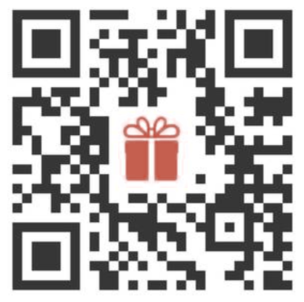

You can also specify them by linking to them with HTML code, or outputting the bytes from a script command as in the following examples:

In [13]:
$imageUrl = 'https://upload.wikimedia.org/wikipedia/commons/2/2f/PowerShell_5.0_icon.png'
@{ "html" = "<img src='$imageUrl' width='128' />" } | Write-Jupyter

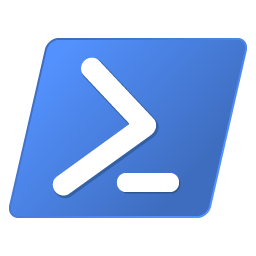

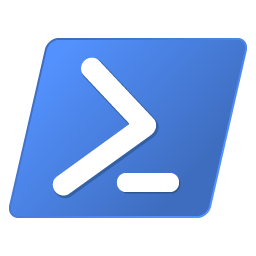

Name                           Value                                                                                    
----                           -----                                                                                    
png                            {137, 80, 78, 71...}

In [12]:
$ImageData = @{ "png" = (Invoke-WebRequest $imageUrl -UseBasicParsing).RawContentStream.GetBuffer() }
$ImageData

Write-Jupyter -InputObject $ImageData -Metadata @{ "image/png" = @{ 'width' = 32 } }
Write-Jupyter -InputObject $ImageData -Metadata @{ "image/png" = @{ 'width' = 64 } }

In [11]:
# You can add rendering properties to objects: text, html, markdown, latex, json, javascript, png, jpeg, svg ...
$Files | Add-Member ScriptProperty html {$this | ConvertTo-Html Mode, LastWriteTime, Name, Length -Fragment } -Force
$Files | Write-Jupyter

Mode LastWriteTime Name Length 
 -a---- 6/16/2017 11:57:42 PM .gitattributes 2581

Mode LastWriteTime Name Length 
 -a---- 6/28/2017 1:04:01 AM .gitignore 4597

Mode LastWriteTime Name Length 
 -a---- 7/3/2017 1:54:06 AM Install.ps1 5906

Mode LastWriteTime Name Length 
 -a---- 6/27/2017 9:38:09 PM Jupyter-PowerShell.sln 1903

Mode LastWriteTime Name Length 
 -a---- 6/26/2017 1:54:08 PM kernel.json 289

Mode LastWriteTime Name Length 
 -a---- 6/24/2017 3:07:27 AM LICENSE.md 1140

Mode LastWriteTime Name Length 
 -a---- 7/12/2017 12:46:59 AM nuget.config 352

Mode LastWriteTime Name Length 
 -a---- 7/12/2017 12:52:55 AM null 10113

Mode LastWriteTime Name Length 
 -a---- 7/12/2017 1:48:29 AM ReadMe.ipynb 93849

Mode LastWriteTime Name Length 
 -a---- 6/28/2017 1:27:51 AM ReadMe.md 2540

Mode LastWriteTime Name Length 
 -a---- 7/12/2017 1:12:17 AM Release.ipynb 5035

In [10]:
# TODO: fix double-json encoding
@{"json" = $Files | ConvertTo-Json} | Write-Jupyter

### I fixed [3](https://github.com/Jaykul/Jupyter-PowerShell/issues/3) so errors show up:

In [ ]:
Get-ChildItem nosuchfile

Get-ChildItem : Cannot find path 'C:\Users\Joel\Projects\Jupyter\Jupyter-PowerShell\PowerShell-Kernel\nosuchfile' because it does not exist.


PathNotFound,Microsoft.PowerShell.Commands.GetChildItemCommand: Get-ChildItem : Cannot find path 'C:\Users\Joel\Projects\Jupyter\Jupyter-PowerShell\PowerShell-Kernel\nosuchfile' because it does not exist.


In [ ]:
iwr natas2.natas.labs.overthewire.org

iwr : <!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html><head>
<title>401 Unauthorized</title>
</head><body>
<h1>Unauthorized</h1>
<p>This server could not verify that you
are authorized to access the document
requested.  Either you supplied the wrong
credentials (e.g., bad password), or your
browser doesn't understand how to supply
the credentials required.</p>
<hr>
<address>Apache/2.4.10 (Debian) Server at natas2.natas.labs.overthewire.org Port 80</address>
</body></html>



WebCmdletWebResponseException,Microsoft.PowerShell.Commands.InvokeWebRequestCommand: iwr : <!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html><head>
<title>401 Unauthorized</title>
</head><body>
<h1>Unauthorized</h1>
<p>This server could not verify that you
are authorized to access the document
requested.  Either you supplied the wrong
credentials (e.g., bad password), or your
browser doesn't understand how to supply
the credentials required.</p>
<hr>
<address>Apache/2.4.10 (Debian) Server at natas2.natas.labs.overthewire.org Port 80</address>
</body></html>



In [ ]:
Get-Credential -UserName Joel -Message "Type 'Password'"

 : A parameter cannot be found that matches parameter name 'Message'.


NamedParameterNotFound,Get-Credential:  : A parameter cannot be found that matches parameter name 'Message'.
